In [2]:
# FIRST BLOCK
# Read csv file into Colaboratory:
# Refer to https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# SECOND BLOCK
downloaded = drive.CreateFile({'id':'1dx-vlrkG37ezyz9J0OGmqNzIvDBi7dYJ'})
downloaded.GetContentFile('globalterrorismdb_0718dist.csv')

In [7]:
# THIRD BLOCK
# Load data as pandas dataframe
import pandas as pd 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
data.shape
# print(data.corr())
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','region_txt':'Region','attacktype1_txt':'AttackType','nkill':'Killed','nwound':'Wounded','gname':'Name','weaptype1_txt':'Weapon_type'},inplace=True)
data=data[['Year','Month','Day','Region','AttackType','Killed','Wounded','Name','Weapon_type']]
data.isnull().sum()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Year               0
Month              0
Day                0
Region             0
AttackType         0
Killed         10313
Wounded        16311
Name               0
Weapon_type        0
dtype: int64

In [8]:
data.Killed.fillna(0,inplace = True)
data.Wounded.fillna(0,inplace = True)


# Q1: Show the top-10 active terrorist groups (except for ‘Unknown’) from 2000. How have their activities changed over the years? (Note: Related columns are “iyear” and “gname”. Each row represents one activity.  )

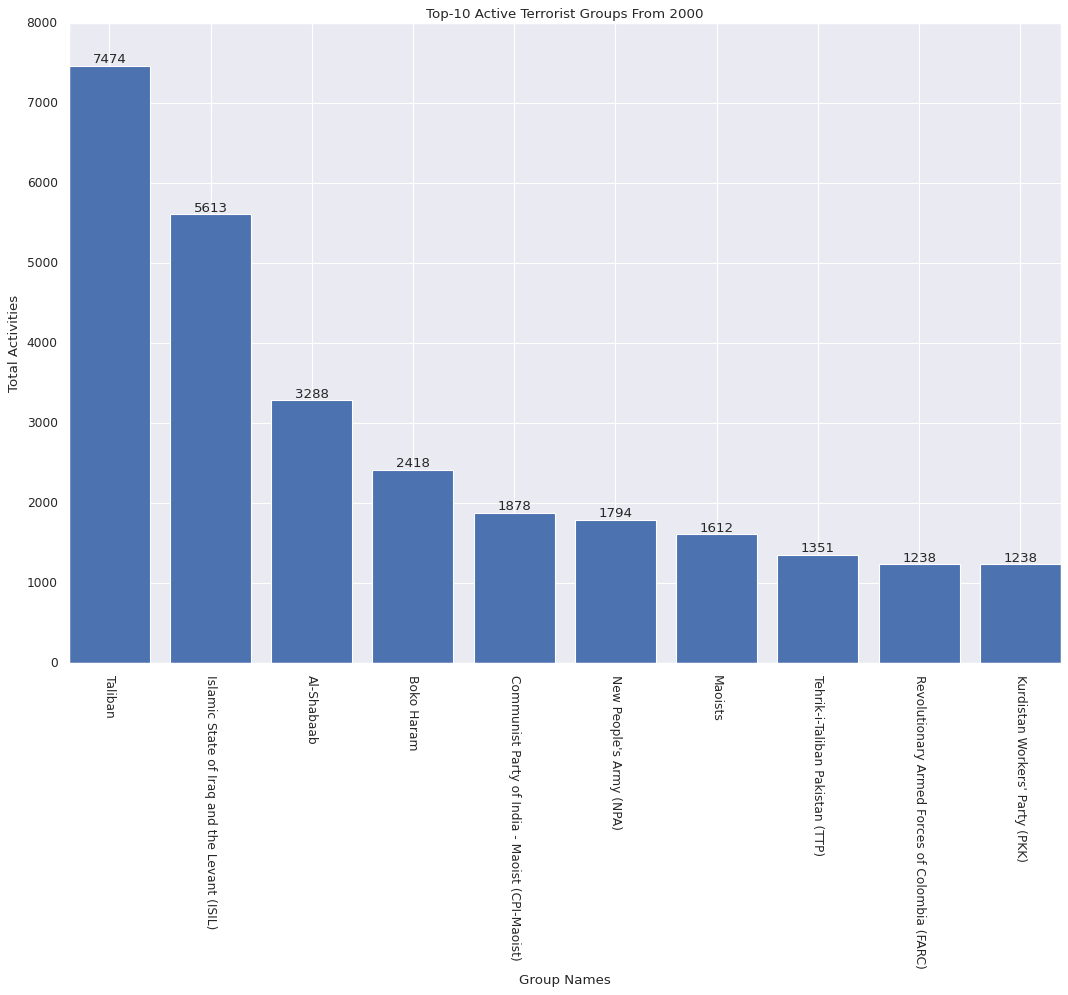

In [9]:

import matplotlib.pyplot as plt
plt.style.use('classic')

import seaborn as sns
sns.set()

plt.figure(figsize=(16,10))
top10_count=data[data['Year']>=2000]['Name'].value_counts()[1:11]
X=top10_count.index
Y=top10_count
plt.bar(X, Y)
plt.title('Top-10 Active Terrorist Groups From 2000')
plt.xticks(rotation=270)
plt.xlabel('Group Names')
plt.ylabel('Total Activities')
for x, y in zip(X, Y):
    plt.text(x , y + 0.05, y, ha='center', va='bottom')
plt.show()

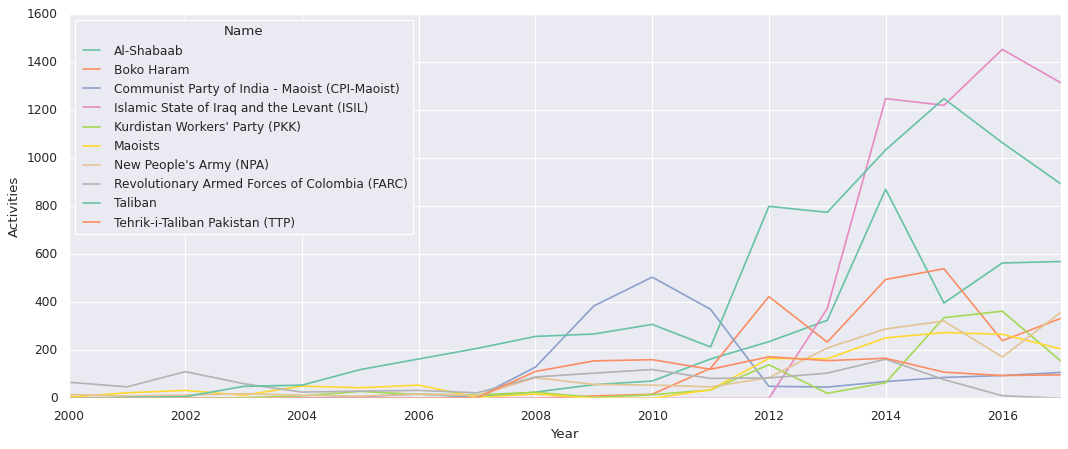

In [ ]:
change=pd.crosstab(data[data['Year']>=2000].Year, data[data['Name'].isin(X)].Name)
change.plot(color=sns.color_palette('Set2',10))

fig=plt.gcf()
plt.ylabel('Activities')
plt.ticklabel_format(useOffset=False)
plt.xlim(2000, 2017)
fig.set_size_inches(16,6)
plt.show()

## Answer:

# Q2:Which terrorist groups caused the high total numbers of both kills and wounds for the entire recorded period (list up 3-7 groups)?  Is there linear correlation between these numbers of kills and wounds?  (Note: Again, do not include ‘Unknown’ groups when answering these questions. Use ‘nkill’ and ‘nwound’ columns.)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


                                              Killed  Wounded  Total_Number
Name                                                                       
Islamic State of Iraq and the Levant (ISIL)  38923.0  30672.0       69595.0
Taliban                                      29410.0  27932.0       57342.0
Boko Haram                                   20328.0   9473.0       29801.0
Al-Qaida                                      3860.0  24512.0       28372.0
Liberation Tigers of Tamil Eelam (LTTE)      10989.0  11031.0       22020.0
Al-Shabaab                                    9330.0   7624.0       16954.0
Tehrik-i-Taliban Pakistan (TTP)               6042.0   9532.0       15574.0


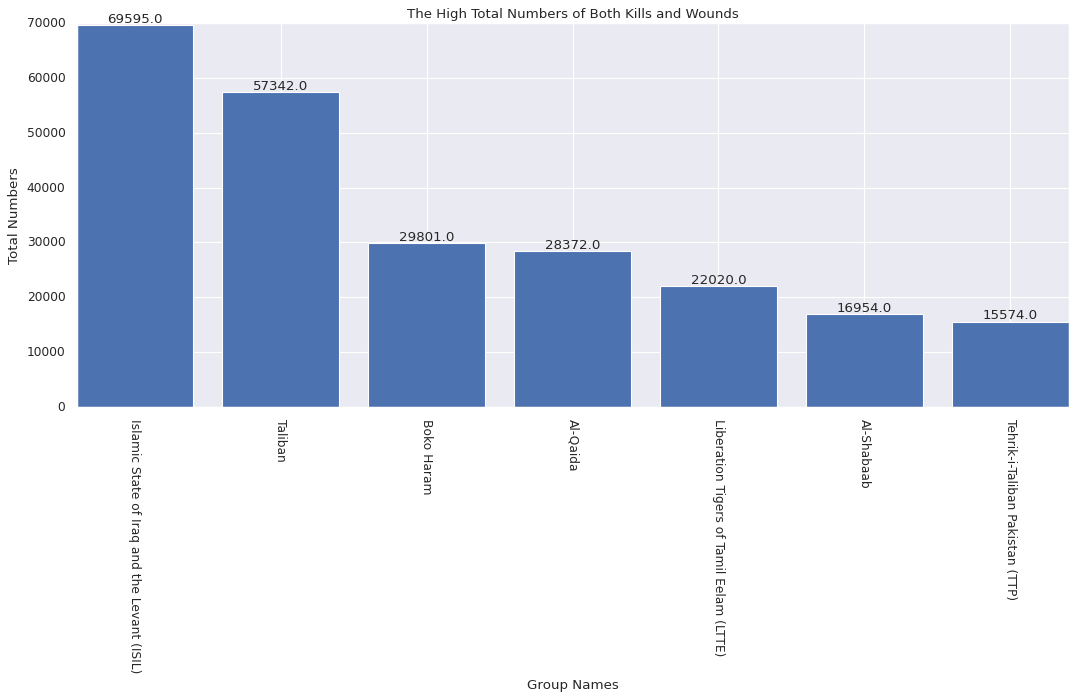

,Killed,Wounded,Total_Number
Killed,1.000000,0.637492,0.930144
Wounded,0.637492,1.000000,0.875867
Total_Number,0.930144,0.875867,1.000000


In [ ]:
df_injure=data.groupby(['Name'])['Killed','Wounded'].sum()
df_injure['Total_Number'] = df_injure.apply(lambda x: x.sum(), axis = 1)
df_injure.sort_values(by=['Total_Number'], inplace=True, ascending=False)
df_injure=df_injure[1:8]
print(df_injure)
plt.figure(figsize=(16,6))
X=df_injure.index
Y=df_injure.Total_Number
plt.bar(X, Y)
plt.title('The High Total Numbers of Both Kills and Wounds')
plt.xticks(rotation=270)
plt.xlabel('Group Names')
plt.ylabel('Total Numbers')
for x, y in zip(X, Y):
    plt.text(x , y + 0.05, y, ha='center', va='bottom')
plt.show()

df_injure.corr()

## Answer:

# Q3: What are the common weapons used in all the terrorism attacks for the entire recorded period (list the top-3 except for ‘Unknown’)?  (Note: Use ‘weaptype1_txt’ column.)

Explosives    92426
Firearms      58524
Incendiary    11135
Name: Weapon_type, dtype: int64


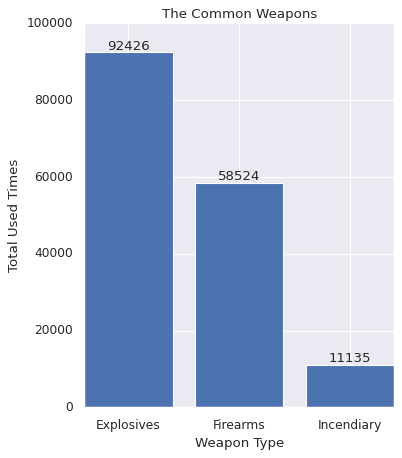

In [ ]:
top3_weapon=data['Weapon_type'].value_counts()[:4]
top3_weapon=top3_weapon.drop(top3_weapon.index[2])
print(top3_weapon)

plt.figure(figsize=(5,6))
X=top3_weapon.index
Y=top3_weapon
plt.bar(X, Y)
plt.title('The Common Weapons')
# plt.xticks(rotation=270)
plt.xlabel('Weapon Type')
plt.ylabel('Total Used Times')
for x, y in zip(X, Y):
    plt.text(x , y + 0.05, y, ha='center', va='bottom')
plt.show()

## Answer:

# Q4: Which numerical dimensions (columns) in the dataset has the strong linear correlations?  (Note: Check columns description in Keggle (Links to an external site.) and decide which columns should be included for correlation analysis. For example, ‘weaptype1’ is not related. Also, do not include columns that you cannot guess the meaning at all (e.g., ‘INT_LOG’). ) 

## Answer: I think the "ransompaid", "ransompaidus" and "nhostkidus", these three columns have strong linear *correlations*

# Q5: What are differences in the terrorism attacks by ‘Taliban’ and ‘Islamic State of Iraq and the Levant (ISIL)’?  (Note: This is an open question. Find any differences and discuss these differences. This should not be the same findings answered for the above questions. ) 

object


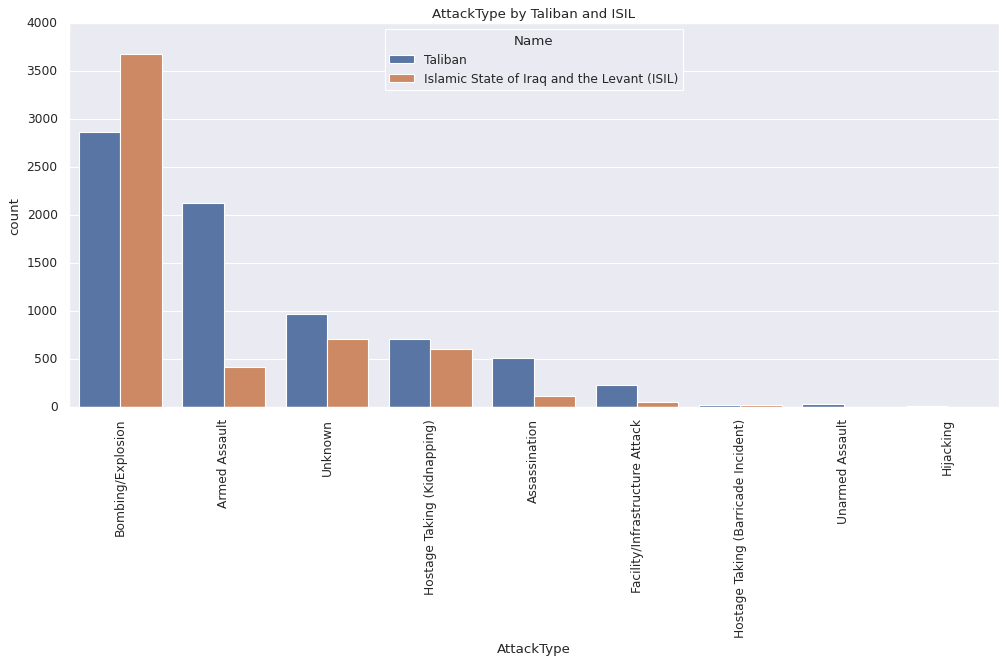

In [ ]:
df_Taliban_ISIL=data.loc[(data['Name']=="Taliban") | (data['Name']=="Islamic State of Iraq and the Levant (ISIL)"),['Name','AttackType']]
plt.subplots(figsize=(15,6))
sns.countplot(x='AttackType',data=df_Taliban_ISIL,order=df_Taliban_ISIL['AttackType'].value_counts().index,hue='Name')
plt.xticks(rotation=270
           )
plt.title('AttackType by Taliban and ISIL')
plt.show()

## Answer:

# Q6: What are some of the unique or interesting patterns and insights that you found from this dataset?  (Note: This is also an open question. This should not be the same findings answered for the above questions.)

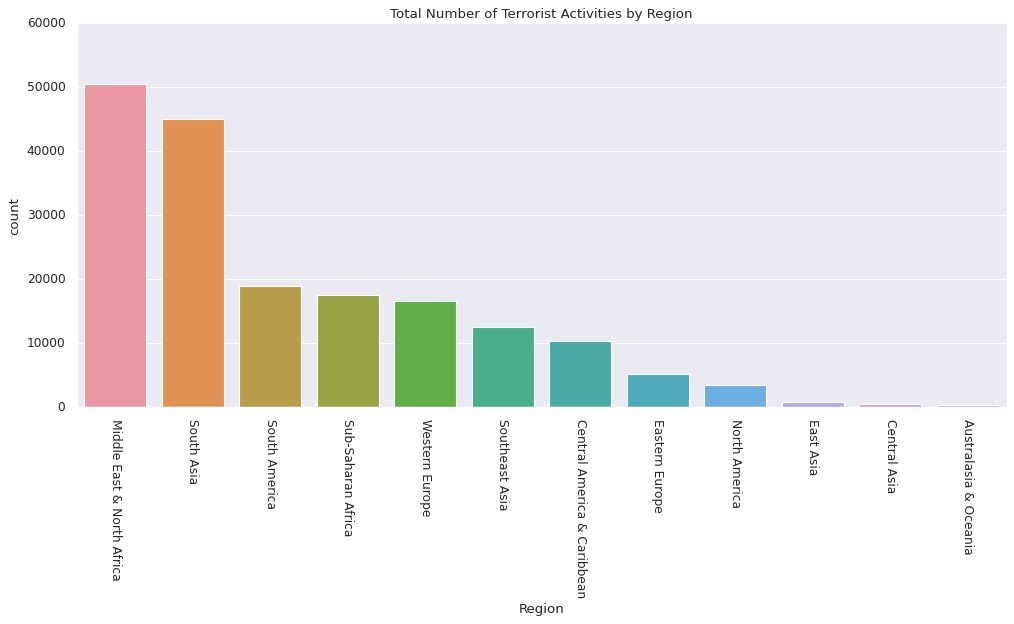

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(x=data.Region,data=data,order=data['Region'].value_counts().index)
plt.xticks(rotation=270)
plt.title('Total Number of Terrorist Activities by Region')
plt.show()

## Answer: